# Descripción del proyecto

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes. Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Introducción 

En el mundo de los viajes compartidos, entender my bien las preferencias de los usuarios y el impacto de factores externos es crucial para el éxito de una nueva empresa. En este proyecto, realizaremos un análisis detallado de los datos disponibles para Zuber, una empresa emergente de viajes compartidos que está a punto de empezar su operación en Chicago.

El objetivo principal es descubrir patrones significativos en los datos para mejorar la estrategia empresarial. Este proyecto se centrará en la comprensión de las preferencias de los pasajeros y el impacto que tienen los factores externos en cada uno de los viajes.



### Inicialización

In [1]:
# Cargar todas las librerías que creemos vamos a utilizar
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

### Cargar datos

In [2]:
# cargamos todos los archivos de datos en un dataframe diferente 

company_df = pd.read_csv('/datasets/project_sql_result_01.csv')
neighborhoods_df = pd.read_csv('/datasets/project_sql_result_04.csv')
trips_df = pd.read_csv('/datasets/project_sql_result_07.csv')


## Análisis exploratorio de datos (Python)

In [3]:
#mostramos la informacion del dataframe company_df con el metodo info()
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
#mostramos la informacion del dataframe neighborhoods_df con el metodo info()
neighborhoods_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
#mostramos la informacion del dataframe trips_df con el metodo info()
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [6]:
#Mostramos la primeras filas del dataframe company_df

print(company_df.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [7]:
#Mostramos la primeras filas del dataframe neighborhoods_df

print(neighborhoods_df.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [8]:
#Mostramos la primeras filas del dataframe trips_df
print(trips_df.head())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [9]:
# transformamos la columna start_ts de la tabla trips_df en tipo datetime con el metodo to_datetime()

trips_df['start_ts'] = pd.to_datetime(trips_df['start_ts'], format= '%Y-%m-%dT%H:%M:%S')

#confirmamos el cambio del tipo de datos
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


### Duplicados

In [10]:
#validamos si tenemos duplicados en los dataframes con el metodo duplicated()
print(company_df.duplicated().sum())
print(neighborhoods_df.duplicated().sum())
print(trips_df.duplicated().sum())

0
0
197


In [11]:
# revisamos los duplicados de la tabla trips_df

print(trips_df[trips_df.duplicated()])

                start_ts weather_conditions  duration_seconds
62   2017-11-11 06:00:00               Good            1260.0
74   2017-11-11 08:00:00               Good            1380.0
76   2017-11-04 09:00:00               Good            1380.0
117  2017-11-11 07:00:00               Good            1380.0
119  2017-11-04 14:00:00               Good            3300.0
...                  ...                ...               ...
1054 2017-11-11 07:00:00               Good            1380.0
1058 2017-11-25 12:00:00               Good            1440.0
1062 2017-11-11 06:00:00               Good            1500.0
1065 2017-11-11 13:00:00               Good            2100.0
1066 2017-11-11 08:00:00               Good            1380.0

[197 rows x 3 columns]


se evidencian datos duplicados en la tabla trips_df, sin embargo, no se procede a eliminar dichos datos ya que esta tabla contiene datos sobre viajes desde el loop hasta el aeropuerto, por lo cual se pueden haber tomado servicio a la misma hora diferentes personas

### Valoress ausentes

In [12]:
# Validamos si tenemos valores ausentes en los dataframes con el metodo isna()

print(company_df.isna().sum())
print()
print(neighborhoods_df.isna().sum())
print()
print(trips_df.isna().sum())

company_name    0
trips_amount    0
dtype: int64

dropoff_location_name    0
average_trips            0
dtype: int64

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


### Principales Barrios

In [13]:
#ordenamos el dataframe neighborhoods_df por la columna average_trips con el metodo sort_values

top_10_neigborhoods = neighborhoods_df.sort_values('average_trips', ascending= False).head(10)

print(top_10_neigborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


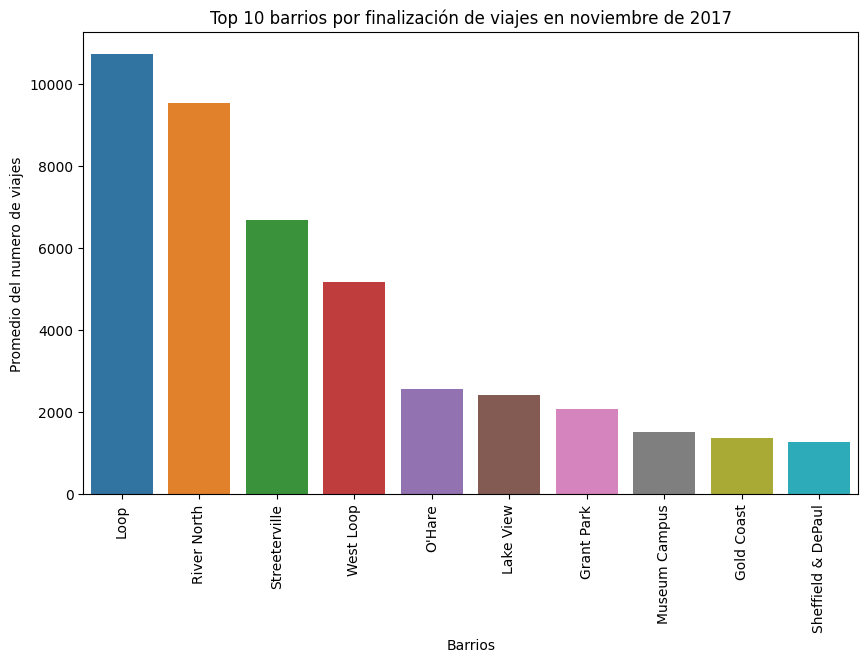

In [14]:
# Generamos un grafico de la anterior tabla para visualizar los datos

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_neigborhoods, x='dropoff_location_name', y='average_trips')
plt.title('Top 10 barrios por finalización de viajes en noviembre de 2017')
plt.xticks(rotation=90)
plt.xlabel('Barrios')
plt.ylabel('Promedio del numero de viajes')
plt.show()

### Principales empresas

In [15]:
#ordenamos el dataframe company_df por la columna trips_amount con el metodo sort_values

top_10_companies = company_df.sort_values('trips_amount', ascending= False).head(10)

print(top_10_companies)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


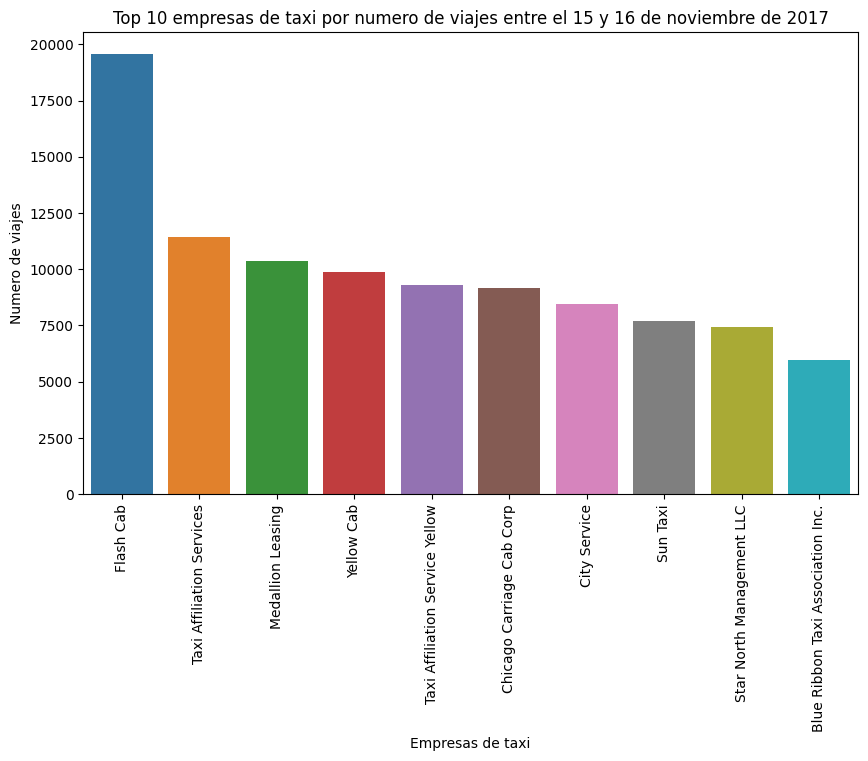

In [16]:
# Generamos un grafico de la anterior tabla para visualizar los datos

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_companies, x='company_name', y='trips_amount')
plt.title('Top 10 empresas de taxi por numero de viajes entre el 15 y 16 de noviembre de 2017')
plt.xticks(rotation=90)
plt.xlabel('Empresas de taxi')
plt.ylabel('Numero de viajes')
plt.show()

Los datos muestran que los barrios centrales de Chicago, como Loop, River North, y Streeterville, son los destinos más comunes para las finalizaciones de viajes, con Loop liderando ampliamente con un promedio de 10.727 viajes. Esto indicaria que las áreas céntricas y aquellas con alta densidad de actividades comerciales, culturales y de entretenimiento tienen una mayor demanda de servicios de transporte. 

Por la parte de las empresas vemos que Flash Cab domina el mercado ampliamente, seguido por Taxi Affiliation Services y Medallion Leasing. Estas empresas han logrado capturar una parte significativa de la demanda, probablemente gracias a su disponibilidad, reconocimiento de marca, y quizás una gran cantidad de vehículos. de igual forma vemos un mercado diversificado ya que hay varias empresas con un numero considerable de viajes.

## Prueba de hipótesis (Python)

### Hipótesis de la duración de los viajes los sábados lluviosos

In [26]:

# Hipotesis Nula(Ho): "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos".

# Hipotesis Alternativa(H1): "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare si cambia los sábados lluviosos"


# filtramos los datos para los dias sabados.
trips_df['day_of_week'] = trips_df['start_ts'].dt.day_name() # creamos una nueva columna llamada day_of_week con el metodo .dt

saturdays_trips = trips_df[trips_df['day_of_week'] == 'Saturday']

#ahora filtramos las duraciones para los dias sabados lluviosos
rainy_saturdays = saturdays_trips[saturdays_trips['weather_conditions'] == 'Bad']['duration_seconds']

#ahora filtramos las duraciones para los dias sabados no lluviosos
no_rainy_saturdays = saturdays_trips[saturdays_trips['weather_conditions'] != 'Bad']['duration_seconds']


In [28]:

#Realizamos la prueba de Levene para evaluar la igualdad de las varianzas
levene_stat, levene_p = st.levene(rainy_saturdays, no_rainy_saturdays)
# Decidimos si usamos equal_var=True o False según el resultado de la prueba de Levene
if levene_p < 0.05:
    equal_var = False
    print("Las varianzas son significativamente diferentes. Usaremos equal_var=False en la prueba t.")
else:
    equal_var = True
    print("No hay evidencia suficiente para decir que las varianzas son diferentes. Usaremos equal_var=True en la prueba t.")

No hay evidencia suficiente para decir que las varianzas son diferentes. Usaremos equal_var=True en la prueba t.


In [31]:
#realizamos la prueba t para probar la hipotesis
alpha = 0.05 # colocamos el nivel de significancia estadística crítica, si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(rainy_saturdays, no_rainy_saturdays, equal_var = equal_var)
print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparamos el valor p con alpha
    print("Rechazamos la hipótesis nula, La duración promedio de los viajes cambia en los sábados lluviosos")
else:
    print("No podemos rechazar la hipótesis nula, No hay evidencia suficiente para decir que la duración promedio de los viajes cambia en los sábados lluviosos")

valor p:  6.517970327099473e-12
Rechazamos la hipótesis nula, La duración promedio de los viajes cambia en los sábados lluviosos


Se plantea la hipotesis nula y alternativa con base en si cambia la duracion de los viajes debido a si el dia es lluvioso o no. utilizamos la prueba t donde evaluamos dos muestras (dias sabados lluviosos y dias sabados no lluviosos) donde se utiliza el valor p para determinar si rechazamos o no la hipotesis. Con lo anterior obtenemos que rechazamos la hipotesis nula y nos indica que la duracion promedio de los viajes si cambia en los sabados lluviosos.

## Conclusiones

Las empresas con alta disponibilidad, buen posicionamiento de marca y gran flota de vehículos son las que abarcan la mayor cantidad de la demanda de taxis, como lo vemos con la grafica de las empresas de taxis. lo anterior ya que es muy probable que con dichas características han obtenido la mayoría de viajes en taxis. sin embargo, las demás empresas también cuentan con una cantidad de viajes significativo lo que nos indica que hay un mercado muy diverso.

Las áreas céntricas y comerciales son las que mayor movimiento tienen por lo cual la demanda de taxis es muy grande. lo anterior lo confirma la gran cantidad de viajes que se realizan a los barrios centrales de la ciudad.

De acuerdo al resultado de la prueba de hipótesis, evidenciamos que la duración promedio de los viajes desde el Loop al aeropuerto de O'Hare cambia en los sábados lluviosos, lo que indicaría que la lluvia tiene un impacto importante en el tiempo que demora un viaje en completarse, lo anterior puede deberse a condiciones de trafico, mas precaución por parte del conductor o rutas alternas. Esta información podría ser de gran importancia para la empresa Zuber con el fin de ajustar cantidad de vehículos para días lluviosos o un posible cambio de tarifas para suplir las dificultades en días lluviosos.